In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train=pd.read_csv('C:/Users/jothe/OneDrive/Desktop/Project/CODESOFT/Credit-Card-Transaction-dataset/fraudTrain.csv')
test=pd.read_csv('C:/Users/jothe/OneDrive/Desktop/Project/CODESOFT/Credit-Card-Transaction-dataset/fraudTest.csv')
np.unique(train['is_fraud'])

array([0, 1], dtype=int64)

In [2]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
x=train.drop('is_fraud',axis=1)
y=train['is_fraud']

In [5]:
x_test=test.drop('is_fraud',axis=1)
y_test=test['is_fraud']

In [6]:
data = pd.concat([x,x_test], axis = 0)
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
dtypes: float64(5), int6

In [8]:
data = data.drop(['Unnamed: 0',], axis = 1)

In [9]:
from sklearn.preprocessing import OrdinalEncoder
cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
        'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
x[cols] = encoder.fit_transform(x[cols])

In [17]:
from sklearn.preprocessing import OrdinalEncoder
cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
        'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
x_test[cols] = encoder.fit_transform(x_test[cols])

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x= scaler.fit_transform(x)


In [18]:
x_test=scaler.fit_transform(x_test)

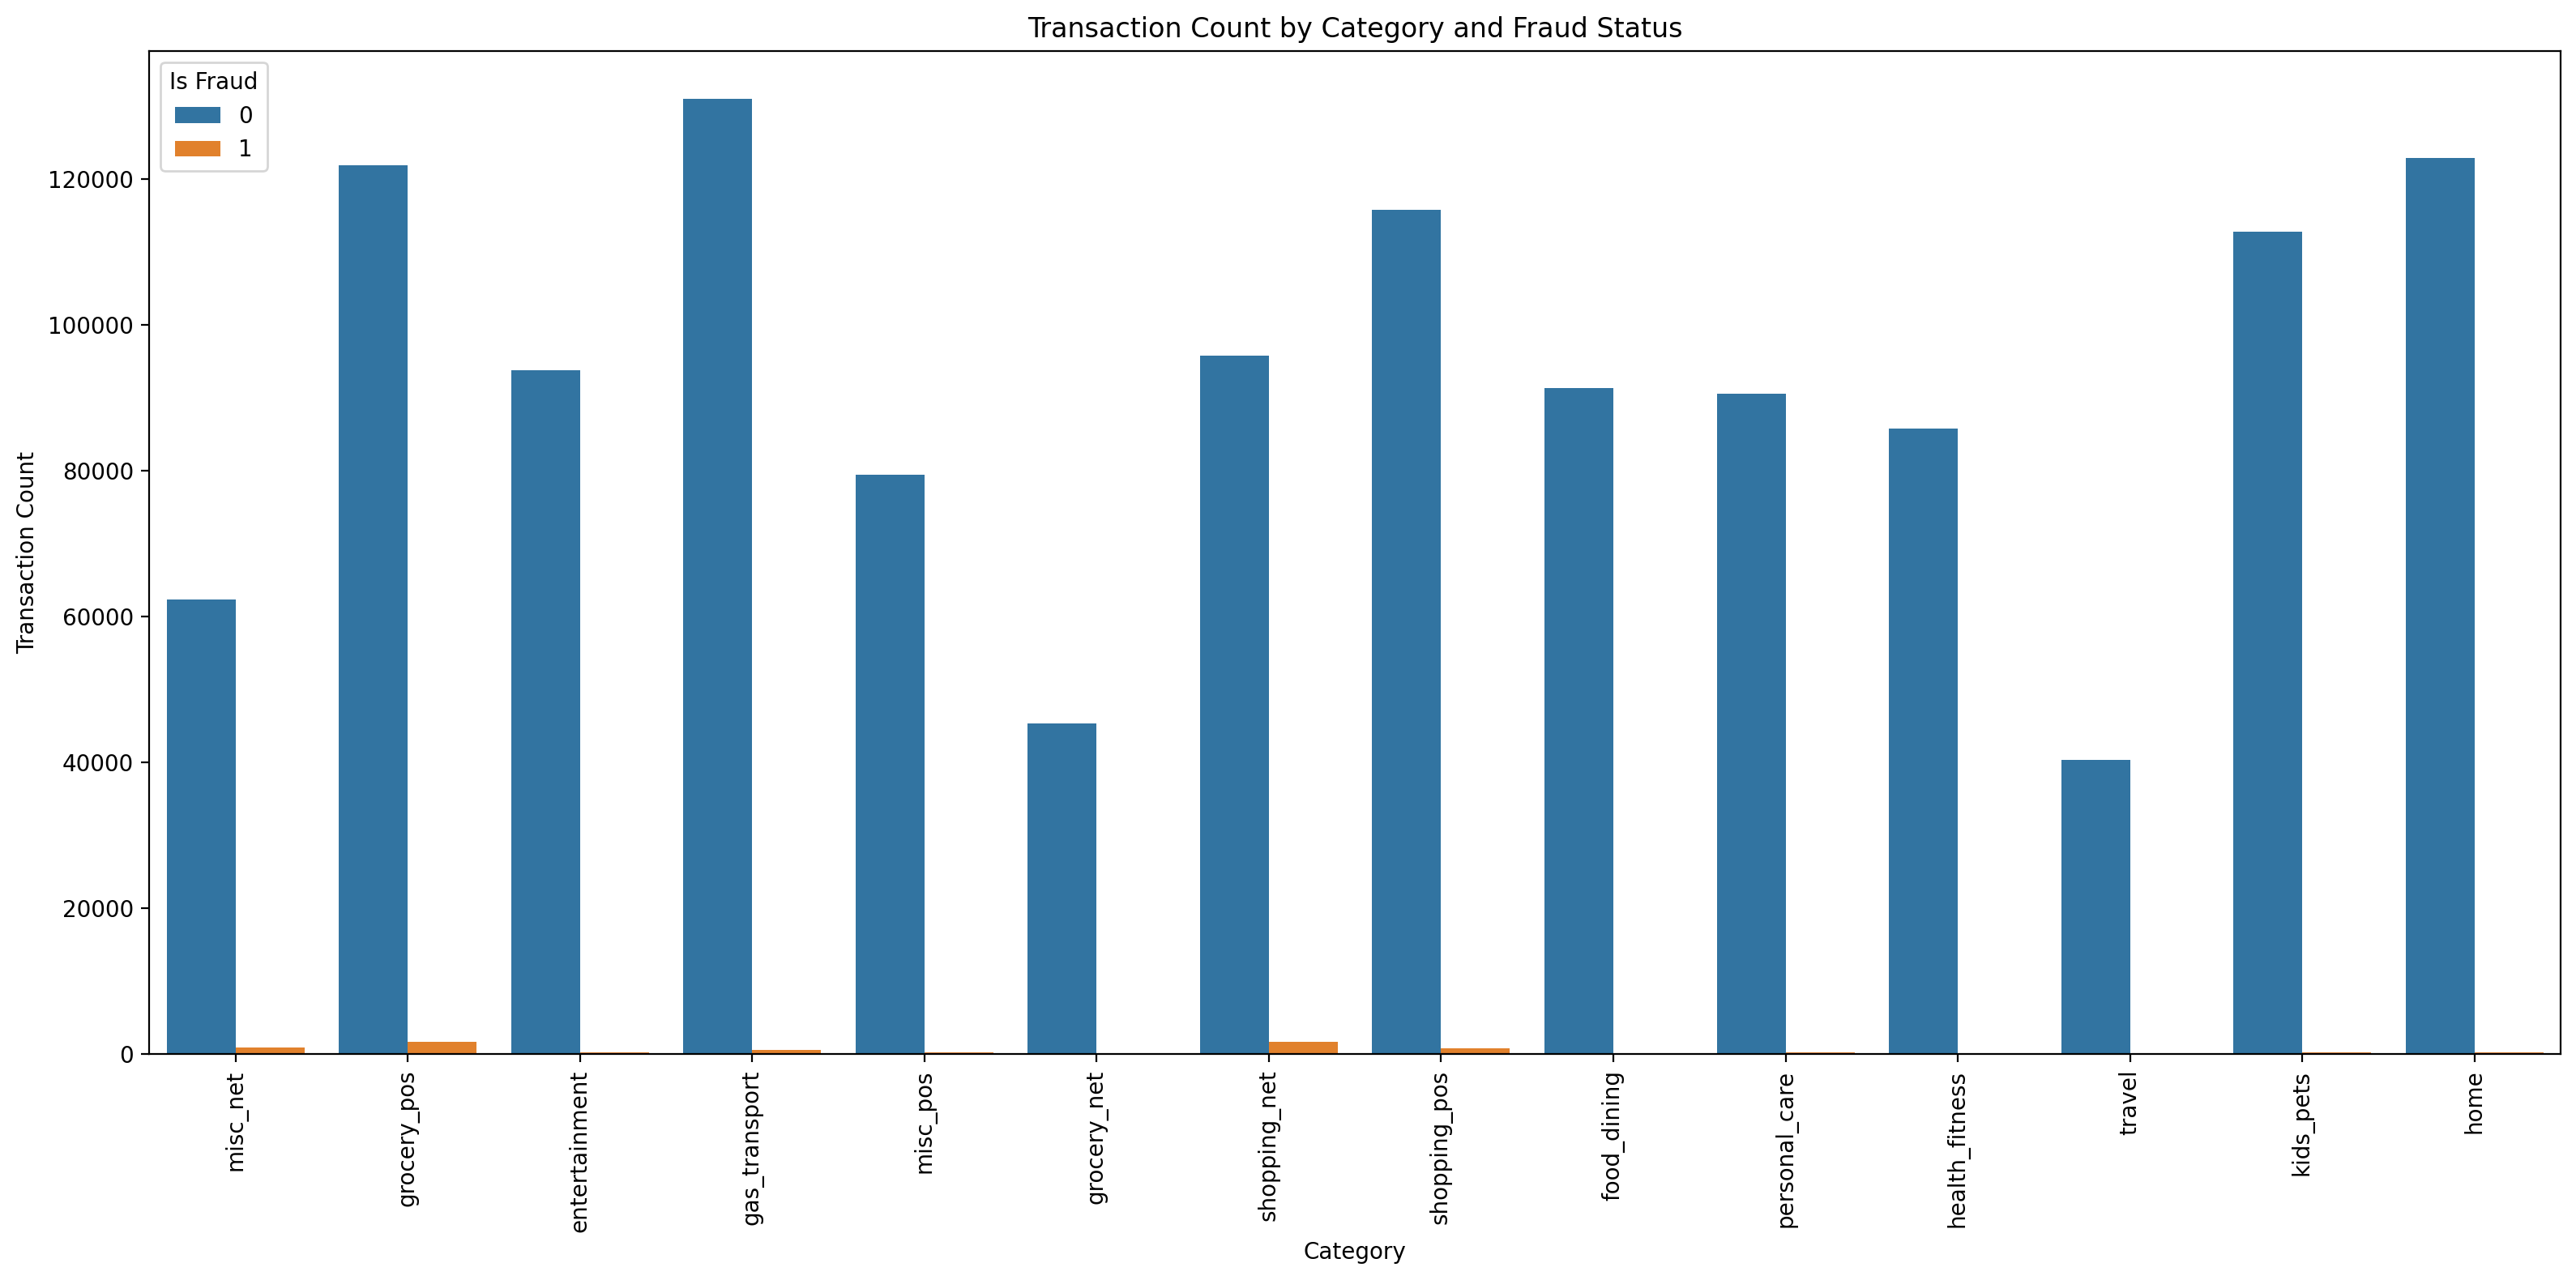

In [12]:
plt.figure(figsize=(16, 8), dpi=200)
sns.countplot(x='category', hue='is_fraud', data=train)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title("Transaction Count by Category and Fraud Status")
plt.xlabel("Category")
plt.ylabel("Transaction Count")
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lr= LogisticRegression()
lr.fit(x, y)

LogisticRegression()

In [20]:
from sklearn.metrics import accuracy_score
pred_test  = lr.predict(x_test)
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))
df=pd.DataFrame({'Predicted':pred_test,'original':y_test})
df.head()
#0->Not Fraud 
#1->Fraud

Testing  Accuracy :  0.9957280568056878


,Predicted,original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x,y)

RandomForestClassifier(random_state=42)

In [22]:
pred_test1  = rfc.predict(x_test)
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test1))
df=pd.DataFrame({'Predicted':pred_test,'original':y_test})
df.head()

Testing  Accuracy :  0.9940653459752141


,Predicted,original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
